# Python Code to show the use of colors 
Dataset: Car price prediction
showing use of colors through RGB Mapping and CIELAB (Uniform) Mapping

Lab 4: Use of Colors


1. Histogram

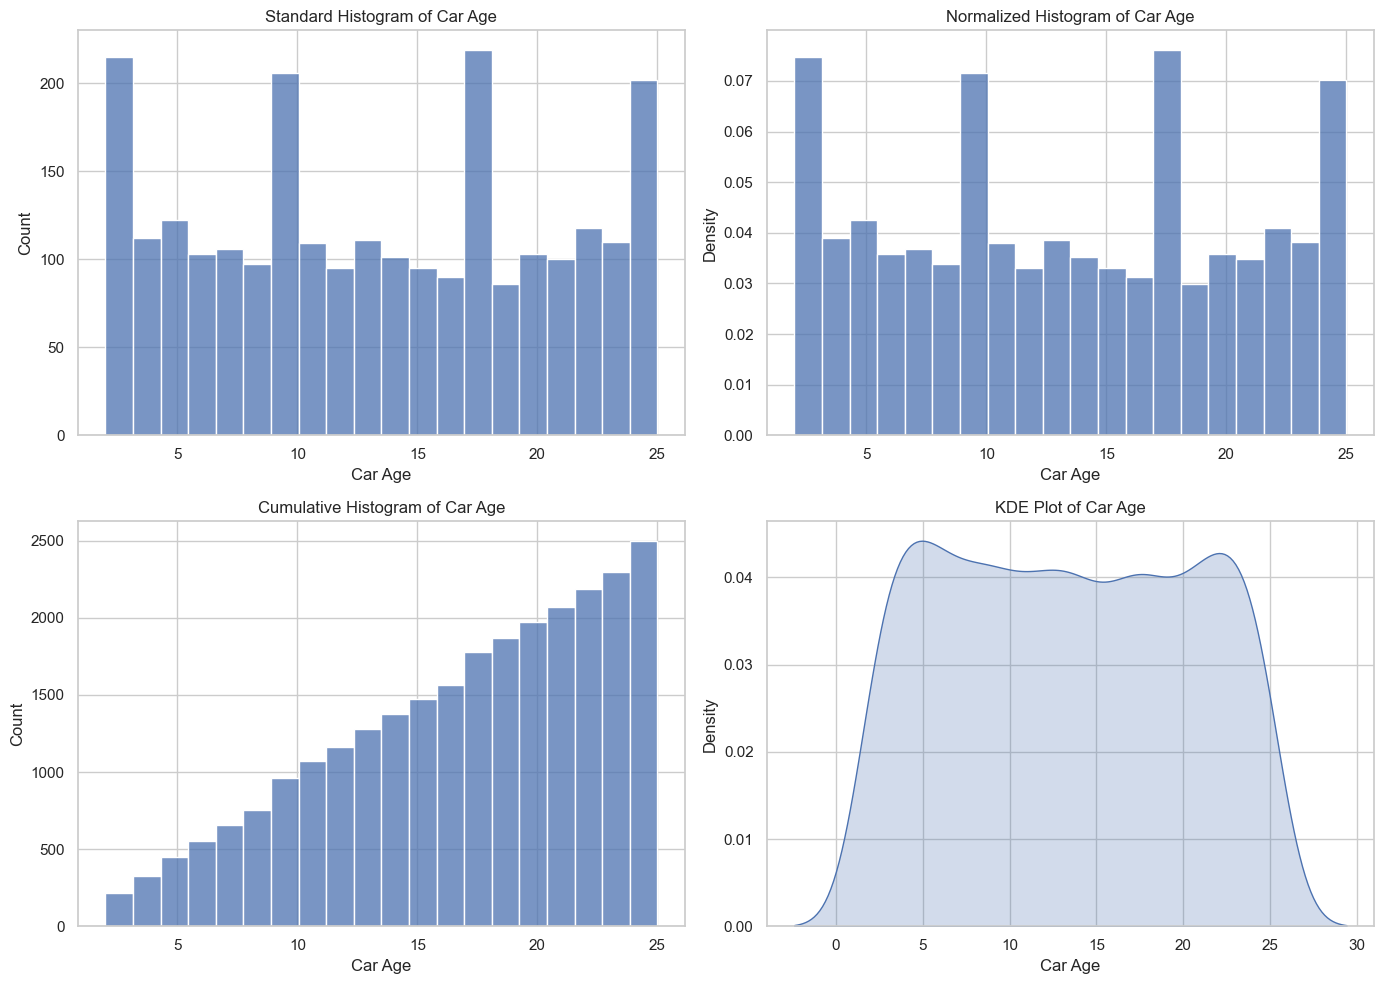

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("car_price_prediction_.csv")

# Creating Car Age from Year
df['Car Age'] = datetime.now().year - pd.to_numeric(df['Year'], errors='coerce')
car_age = df['Car Age'].dropna()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(car_age, bins=20, kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Standard Histogram of Car Age')

sns.histplot(car_age, bins=20, stat='density', kde=False, ax=axs[0, 1])
axs[0, 1].set_title('Normalized Histogram of Car Age')

sns.histplot(car_age, bins=20, cumulative=True, kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Cumulative Histogram of Car Age')

sns.kdeplot(car_age, fill=True, ax=axs[1, 1])
axs[1, 1].set_title('KDE Plot of Car Age')

plt.tight_layout()
plt.show()


2. Bar chart


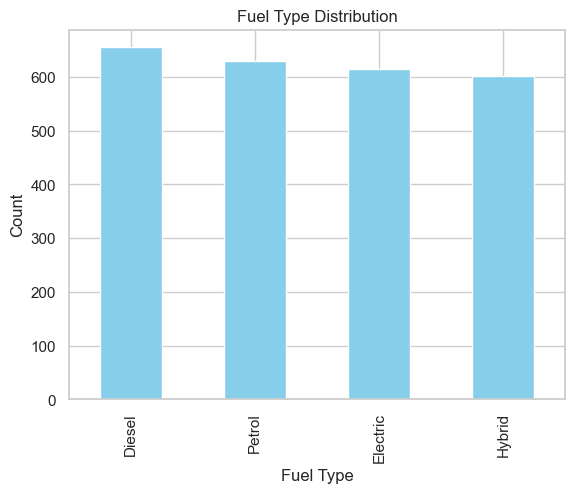

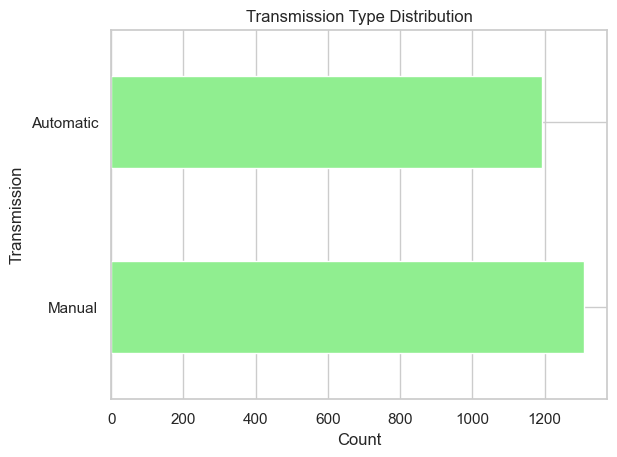

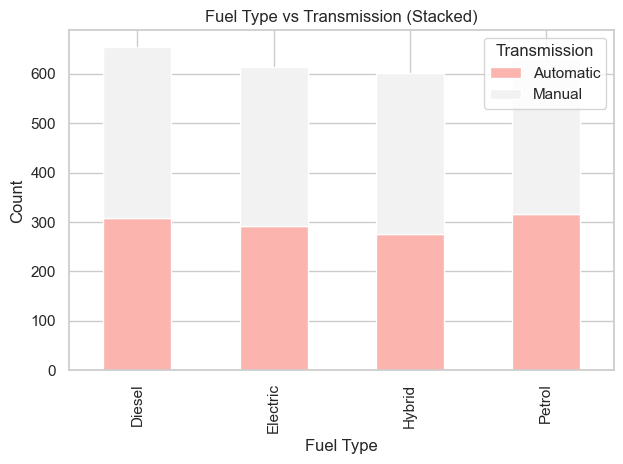

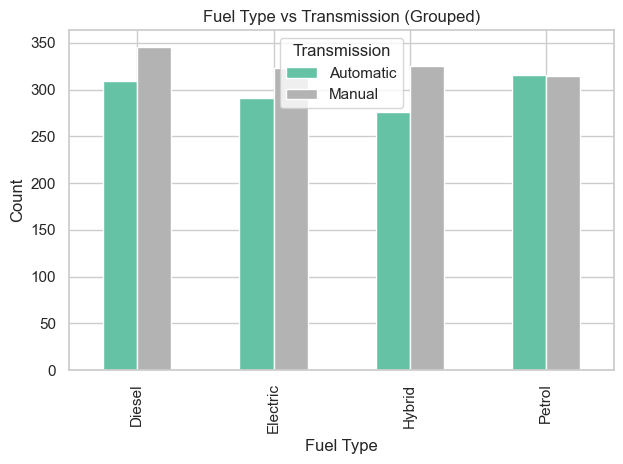

In [5]:
# Vertical Bar Chart
df['Fuel Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

# Horizontal Bar Chart
df['Transmission'].value_counts().plot(kind='barh', color='lightgreen')
plt.title("Transmission Type Distribution")
plt.xlabel("Count")
plt.ylabel("Transmission")
plt.show()

# Stacked Bar Chart
stacked = pd.crosstab(df['Fuel Type'], df['Transmission'])
stacked.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title("Fuel Type vs Transmission (Stacked)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Grouped Bar Chart
stacked.plot(kind='bar', stacked=False, colormap='Set2')
plt.title("Fuel Type vs Transmission (Grouped)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



3. Pie Charts

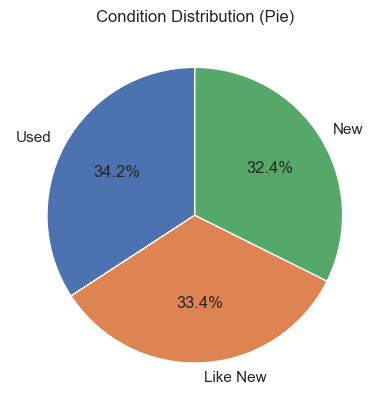

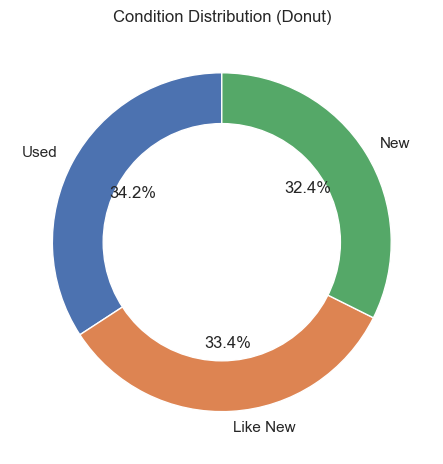

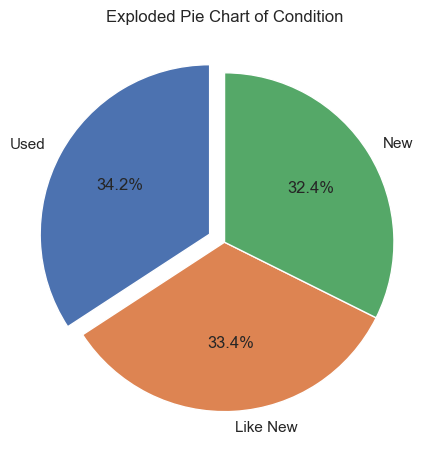

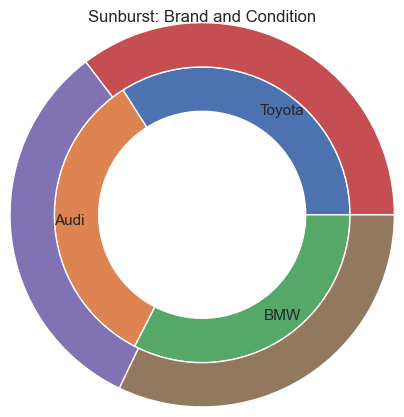

In [6]:
# Pie Chart
df['Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Condition Distribution (Pie)")
plt.ylabel("")
plt.show()

# Donut Chart
counts = df['Condition'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))  # donut hole
plt.title("Condition Distribution (Donut)")
plt.tight_layout()
plt.show()

# Exploded Pie Chart
explode = [0.1 if i == 0 else 0 for i in range(len(counts))]
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title("Exploded Pie Chart of Condition")
plt.tight_layout()
plt.show()

# Nested Pie / Sunburst (Brand and Condition)
inner = df['Brand'].value_counts(normalize=True).head(3)
outer = df[df['Brand'].isin(inner.index)]['Condition'].value_counts()

fig, ax = plt.subplots()
ax.pie(inner, radius=1, labels=inner.index, labeldistance=0.8, wedgeprops=dict(width=0.3))
ax.pie(outer, radius=1.3, labeldistance=1.1, wedgeprops=dict(width=0.3))
plt.title("Sunburst: Brand and Condition")
plt.show()


4. BOX Plots

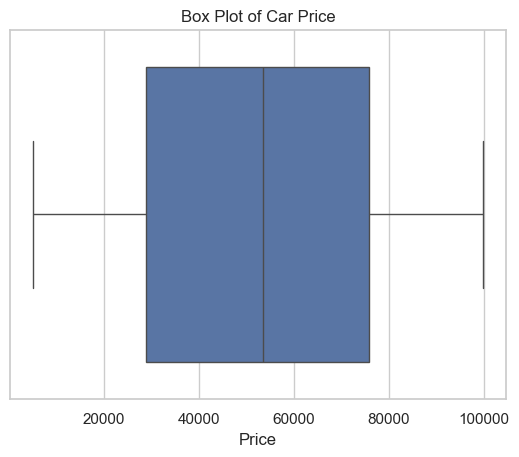

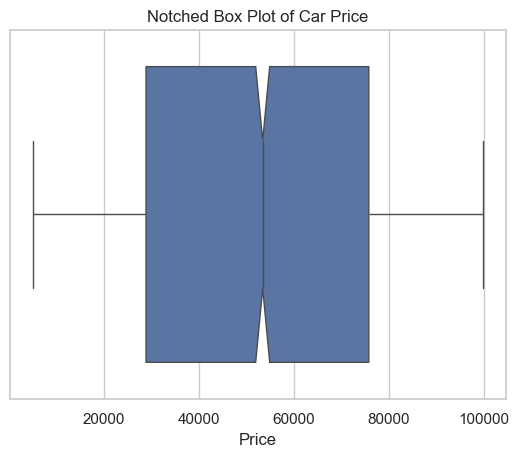

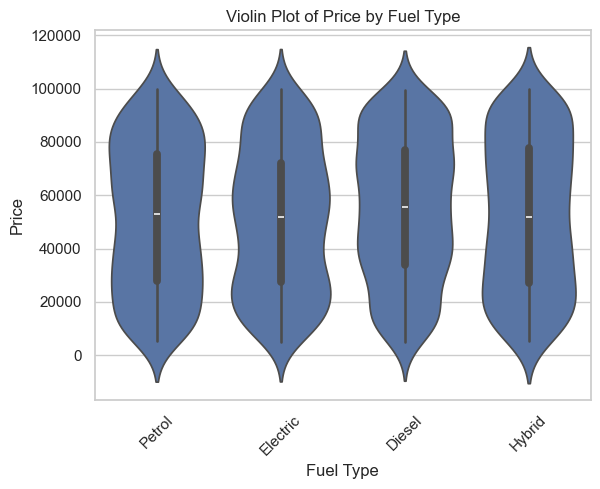

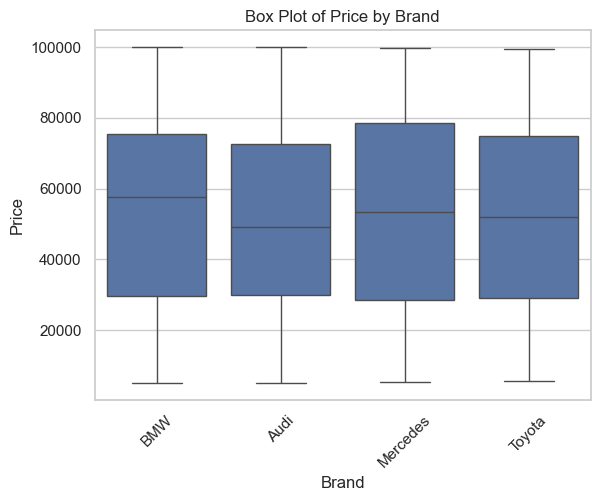

In [7]:
# Standard Box Plot
sns.boxplot(x=df["Price"])
plt.title("Box Plot of Car Price")
plt.show()

# Notched Box Plot
sns.boxplot(x=df["Price"], notch=True)
plt.title("Notched Box Plot of Car Price")
plt.show()

# Violin Plot
sns.violinplot(x="Fuel Type", y="Price", data=df)
plt.title("Violin Plot of Price by Fuel Type")
plt.xticks(rotation=45)
plt.show()

# Side-by-side Box Plot by Brand
top_brands = df['Brand'].value_counts().nlargest(4).index
filtered = df[df['Brand'].isin(top_brands)]
sns.boxplot(x="Brand", y="Price", data=filtered)
plt.title("Box Plot of Price by Brand")
plt.xticks(rotation=45)
plt.show()
